docker run -v ~/Documents/dahak_project/public/dahak/workflows/comparison:/comparison quay.io/biocontainers/sourmash:2.0.0a1--py35_2 sourmash \
compare /comparison/megahit_output_podar_metaG_subset_10.sig \
/comparison/megahit_output_podar_metaG_subset_50.sig \
/comparison/spades_output_podar_metaG_subset_25.sig \
/comparison/megahit_output_podar_metaG_subset_25.sig \
/comparison/spades_output_podar_metaG_subset_10.sig \
/comparison/spades_output_podar_metaG_subset_50.sig --csv /comparison/metaG_comparison.csv

In [43]:
%matplotlib inline

In [44]:
import seaborn as sns
import pandas as pd

In [124]:
df = pd.read_csv("metaG_comparison.csv")
dfnew = df.rename(index=str, columns={"/data/megahit_output_podar_metaG_10/final.contigs.fa": "MEGAHIT Subset 10",
                              "/data/final.contigs.fa": "MEGAHIT Subset 50",
                             "/data/spades_output_podar_metaG_25/contigs.fasta": "SPAdes Subset 25",
                             "/data/megahit_output_podar_metaG_25/final.contigs.fa": "MEGAHIT Subset 25",
                             "/data/spades_output_podar_metaG_10/contigs.fasta": "SPAdes Subset 10",
                             "/data/contigs.fasta": "SPAdes Subset 50"})

dfnew ['']= ["MEGAHIT Shakya Subset 10", "MEGAHIT Shakya Subset 50", "SPAdes Shakya Subset 25",
                            "MEGAHIT Shakya Subset 25","SPAdes Shakya Subset 10", "SPAdes Shakya Subset 50"]
output = dfnew.set_index('')
output

,MEGAHIT Subset 10,MEGAHIT Subset 50,SPAdes Subset 25,MEGAHIT Subset 25,SPAdes Subset 10,SPAdes Subset 50
,,,,,,
MEGAHIT Shakya Subset 10,1.000000,0.605849,0.640330,0.661412,0.811569,0.602969
MEGAHIT Shakya Subset 50,0.605849,1.000000,0.895861,0.885385,0.691961,0.953698
SPAdes Shakya Subset 25,0.640330,0.895861,1.000000,0.922528,0.736035,0.911109
MEGAHIT Shakya Subset 25,0.661412,0.885385,0.922528,1.000000,0.740676,0.874426
SPAdes Shakya Subset 10,0.811569,0.691961,0.736035,0.740676,1.000000,0.694979
SPAdes Shakya Subset 50,0.602969,0.953698,0.911109,0.874426,0.694979,1.000000


In [125]:
import matplotlib.pyplot as plt

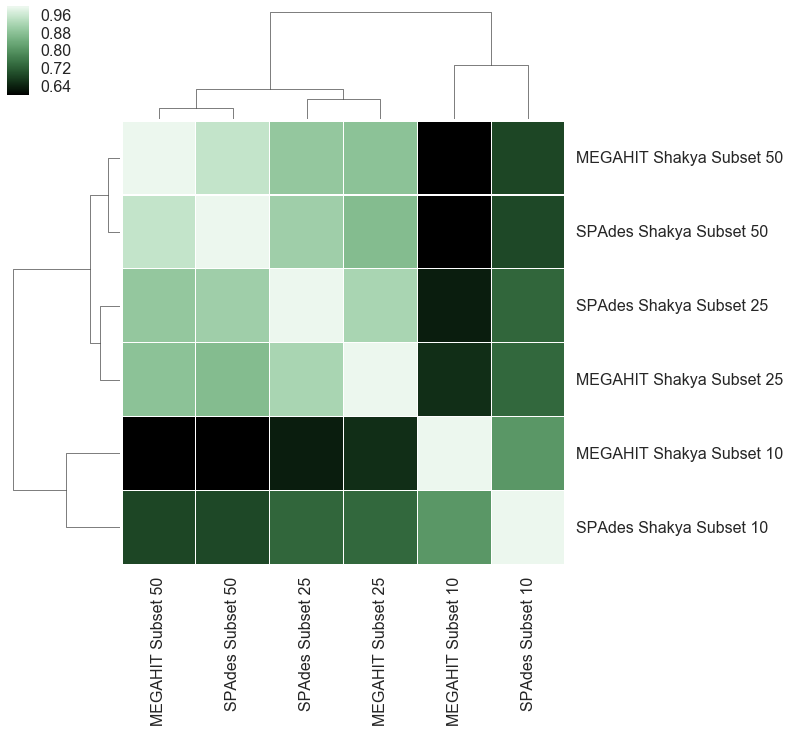

In [128]:
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
o = sns.clustermap(output, col_cluster=True, row_cluster=True, linewidths=.5, figsize=(10, 10), cmap=cmap)
o.ax_heatmap.set_yticklabels(o.ax_heatmap.get_yticklabels(), rotation=0)
sns.set_context('poster')
o.savefig("clustermap.pdf")